In [ ]:
%pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")

# Salvando o dataset no diretório atual
import os
current_dir = os.getcwd()
os.rename(path, os.path.join(current_dir, "news-headlines-dataset-for-sarcasm-detection"))

print("Path to dataset files:", path)

In [1]:
import json

file = "./news-headlines-dataset-for-sarcasm-detection/versions/2/Sarcasm_Headlines_Dataset_v2.json"

with open(file, 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

senteces = []
labels = []
urls = []
for item in data:
    labels.append(item['is_sarcastic'])
    senteces.append(item['headline'])
    urls.append(item['article_link'])

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(senteces)
word_index = tokenizer.word_index

In [3]:
sequences = tokenizer.texts_to_sequences(senteces)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
(28619, 152)


In [4]:
# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

In [10]:
training_senteces = senteces[0:20000]
testing_senteces = senteces[20000:]
training_labels = labels[0:20000]
testing_labels = labels[20000:]

In [11]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(training_senteces)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_senteces)
training_padded = pad_sequences(training_sequences, padding='post')

testing_sequences = tokenizer.texts_to_sequences(testing_senteces)
testing_padded = pad_sequences(testing_sequences, padding='post')

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, embedding_dim=16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
import numpy as np

epochs = 30

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - 7ms/step - accuracy: 0.5270 - loss: 0.6907 - val_accuracy: 0.7053 - val_loss: 0.6681
Epoch 2/30
625/625 - 3s - 4ms/step - accuracy: 0.6047 - loss: 0.6636 - val_accuracy: 0.8024 - val_loss: 0.4997
Epoch 3/30
625/625 - 5s - 8ms/step - accuracy: 0.7563 - loss: 0.5459 - val_accuracy: 0.8069 - val_loss: 0.4189
Epoch 4/30
625/625 - 2s - 3ms/step - accuracy: 0.8166 - loss: 0.4349 - val_accuracy: 0.8250 - val_loss: 0.4708
Epoch 5/30
625/625 - 2s - 3ms/step - accuracy: 0.8401 - loss: 0.3782 - val_accuracy: 0.8344 - val_loss: 0.4905
Epoch 6/30
625/625 - 2s - 3ms/step - accuracy: 0.8475 - loss: 0.3528 - val_accuracy: 0.8359 - val_loss: 0.5239
Epoch 7/30
625/625 - 2s - 3ms/step - accuracy: 0.8742 - loss: 0.3115 - val_accuracy: 0.8477 - val_loss: 0.5022
Epoch 8/30
625/625 - 2s - 3ms/step - accuracy: 0.8784 - loss: 0.2924 - val_accuracy: 0.8543 - val_loss: 0.5067
Epoch 9/30
625/625 - 2s - 3ms/step - accuracy: 0.8891 - loss: 0.2751 - val_accuracy: 0.8550 - val_loss: 0.5301
E

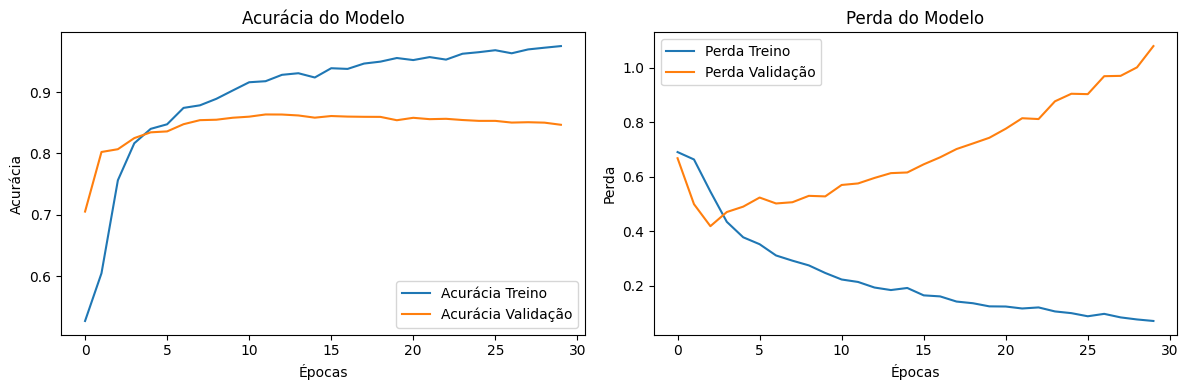

In [36]:
# plotando os graficos de acurácia e perda
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plotando a acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Acurácia Treino')
    plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
    plt.title('Acurácia do Modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    
    # Plotando a perda
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Perda Treino')
    plt.plot(history.history['val_loss'], label='Perda Validação')
    plt.title('Perda do Modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
plot_history(history)

In [44]:
sentence = ["granny starting to fear spiders in the garden might be real",
            "oh, don’t worry, I’m sure that plan will fail spectacularly",
            "game of thrones season finale showing this sunday night",
            "oh, fantastic idea. Let’s ignore reality and go with that",
            "wow, you must be exhausted from all that thinking you didn’t do"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, padding='post')

In [45]:
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[3.0447431e-03]
 [9.9999738e-01]
 [2.3385147e-07]
 [1.4121404e-06]
 [1.0000000e+00]]
